In [1]:
import sys
sys.path.append('/Users/jinchen/Desktop/DSE/IntroML/Project/project-product-price-prediction')

In [54]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
matplotlib.rcParams['figure.figsize'] = (15, 15)
plt.rcParams['figure.constrained_layout.use'] = True

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from sklearn.cluster import MiniBatchKMeans,DBSCAN


# Load the Sample Data
- Sample data is already clean

In [3]:
df = pd.read_csv("../../data/random_samples/stratified_sampling_clean_text_data_by_price_whigh_sz50000_1619835594.csv")
df.shape

(50000, 34)

In [4]:
df.head(3)

train_id                 clean_item_description  \
0    806824                               new tags   
1    772820  nastasya every hills lipstick fashion   
2   1423115      brand new tags taken bag pictures   

   item_description_bef_word_count  item_description_bef_char_count  \
0                              3.0                             13.0   
1                              6.0                             42.0   
2                             11.0                             54.0   

   item_description_bef_avg_word_len  item_description_upper_word_count  \
0                           4.333333                                0.0   
1                           7.000000                                0.0   
2                           4.909091                                0.0   

   item_description_upper_char_count  item_description_stopword_count  \
0                                1.0                              1.0   
1                                4.0                              1.0   
2                                1.0                              5.0   

   item_description_punctuation_count  item_description_number_count  ...  \
0                                 0.0                            0.0  ...   
1                                 0.0                            0.0  ...   
2                                 0.0                            0.0  ...   

   item_name_after_avg_word_len  item_condition_id  \
0                      5.250000                  1   
1                     10.000000                  1   
2                      6.166667                  1   

                          category_name               brand_name  shipping  \
0  Women/Athletic Apparel/Shirts & Tops                     Nike         1   
1                    Beauty/Makeup/Lips  Anastasia Beverly Hills         0   
2                  Women/Jeans/Leggings                  LuLaRoe         0   

   price      c1                c2             c3  price_bin  
0   15.0   women  athletic apparel  shirts & tops   (10, 15]  
1   22.0  beauty            makeup           lips   (20, 25]  
2   54.0   women             jeans       leggings   (50, 60]  

[3 rows x 34 columns]

In [13]:
df.clean_item_description[12]

'corners bottom great shape lips smells markings inside cleanthere small water mark indicated third photo comes dusting'

# Text Feature Extraction

In [71]:
cvectorizer = CountVectorizer(min_df=10,
                              max_features=100000,
                              ngram_range=(1,2))

In [56]:
vectorizer = TfidfVectorizer(min_df=10,
                             max_features=100000,
                             ngram_range=(1, 2))

In [72]:
cvz = cvectorizer.fit_transform(df['clean_item_description'])

In [73]:
print(cvz.shape)

(50000, 14230)


In [74]:
cvectorizer.get_feature_names()[1:10000:1000]

['005',
 'armour',
 'box accessories',
 'color transfer',
 'dismounted',
 'fourth picture',
 'ignored',
 'like men',
 'most',
 'painless steel']

In [57]:
vz = vectorizer.fit_transform(df['clean_item_description'])

In [68]:
vectorizer.get_feature_names()[1:10000:1000]

['005',
 'armour',
 'box accessories',
 'color transfer',
 'dismounted',
 'fourth picture',
 'ignored',
 'like men',
 'most',
 'painless steel']

In [58]:
print(vz.shape)

(50000, 14230)


# Dimension Reduction

In [96]:
DBSCAN_model = DBSCAN(eps=3, min_samples=20)
DBSCAN_clusters = DBSCAN_model.fit_predict(vz)

KeyboardInterrupt: 

In [75]:
num_clusters = 20
kmeans_model = MiniBatchKMeans(n_clusters=num_clusters,
                               init='k-means++',
                               n_init=1,
                               init_size=1000, batch_size=1000, verbose=0, max_iter=1000)

In [76]:
kmeans = kmeans_model.fit(vz)
kmeans_clusters = kmeans.predict(vz)
kmeans_distances = kmeans.transform(vz)

In [89]:
print(kmeans_distances.shape)

(50000, 20)


In [94]:
kmeans_distances[0,:5]

array([1.00227935, 0.99314641, 1.41372816, 1.05188445, 1.00624974])

In [87]:
sorted_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = np.array(vectorizer.get_feature_names())

for i in range(num_clusters):
    print("Cluster %d: \t %s" % (i, " | ".join(terms[sorted_centroids[i, :5]])))
    

Cluster 0: 	 size | small | size small | medium | worn
Cluster 1: 	 new | box | used | black | bundle
Cluster 2: 	 description yet | yet | description | large size | large
Cluster 3: 	 good | good condition | condition | size | used
Cluster 4: 	 bag | leather | dust | dust bag | strap
Cluster 5: 	 phone | unlocked | screen | case | phone is
Cluster 6: 	 am | worn | price | retail | new
Cluster 7: 	 not | size | not size | lularoe | large
Cluster 8: 	 authentic | 100 | 100 authentic | new | box
Cluster 9: 	 free | shipping | free shipping | smoke | home
Cluster 10: 	 dung | are dung | are | lularoe | leggings
Cluster 11: 	 like new | like | new | new condition | condition
Cluster 12: 	 excellent | excellent condition | condition | size | worn
Cluster 13: 	 go | core | ram | inter | charge
Cluster 14: 	 pink | secret | victories | victories secret | secret pink
Cluster 15: 	 new | brand new | brand | tags | new tags
Cluster 16: 	 louis | louis button | button | bag | code
Cluster 17: 	 n

#  Visualization

In [88]:
# reduce dimension to 2 using tsne
tsne_kmeans = tsne_model.fit_transform(kmeans_distances)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 50000 samples in 0.084s...
[t-SNE] Computed neighbors for 50000 samples in 48.598s...
[t-SNE] Computed conditional probabilities for sample 1000 / 50000
[t-SNE] Computed conditional probabilities for sample 2000 / 50000
[t-SNE] Computed conditional probabilities for sample 3000 / 50000
[t-SNE] Computed conditional probabilities for sample 4000 / 50000
[t-SNE] Computed conditional probabilities for sample 5000 / 50000
[t-SNE] Computed conditional probabilities for sample 6000 / 50000
[t-SNE] Computed conditional probabilities for sample 7000 / 50000
[t-SNE] Computed conditional probabilities for sample 8000 / 50000
[t-SNE] Computed conditional probabilities for sample 9000 / 50000
[t-SNE] Computed conditional probabilities for sample 10000 / 50000
[t-SNE] Computed conditional probabilities for sample 11000 / 50000
[t-SNE] Computed conditional probabilities for sample 12000 / 50000
[t-SNE] Computed conditional probabilities for sa

In [91]:
#combined_sample.reset_index(drop=True, inplace=True)
kmeans_df = pd.DataFrame(tsne_kmeans, columns=['x', 'y'])
kmeans_df['cluster'] = kmeans_clusters
kmeans_df['category'] = df['c1']

<AxesSubplot:xlabel='x', ylabel='y'>

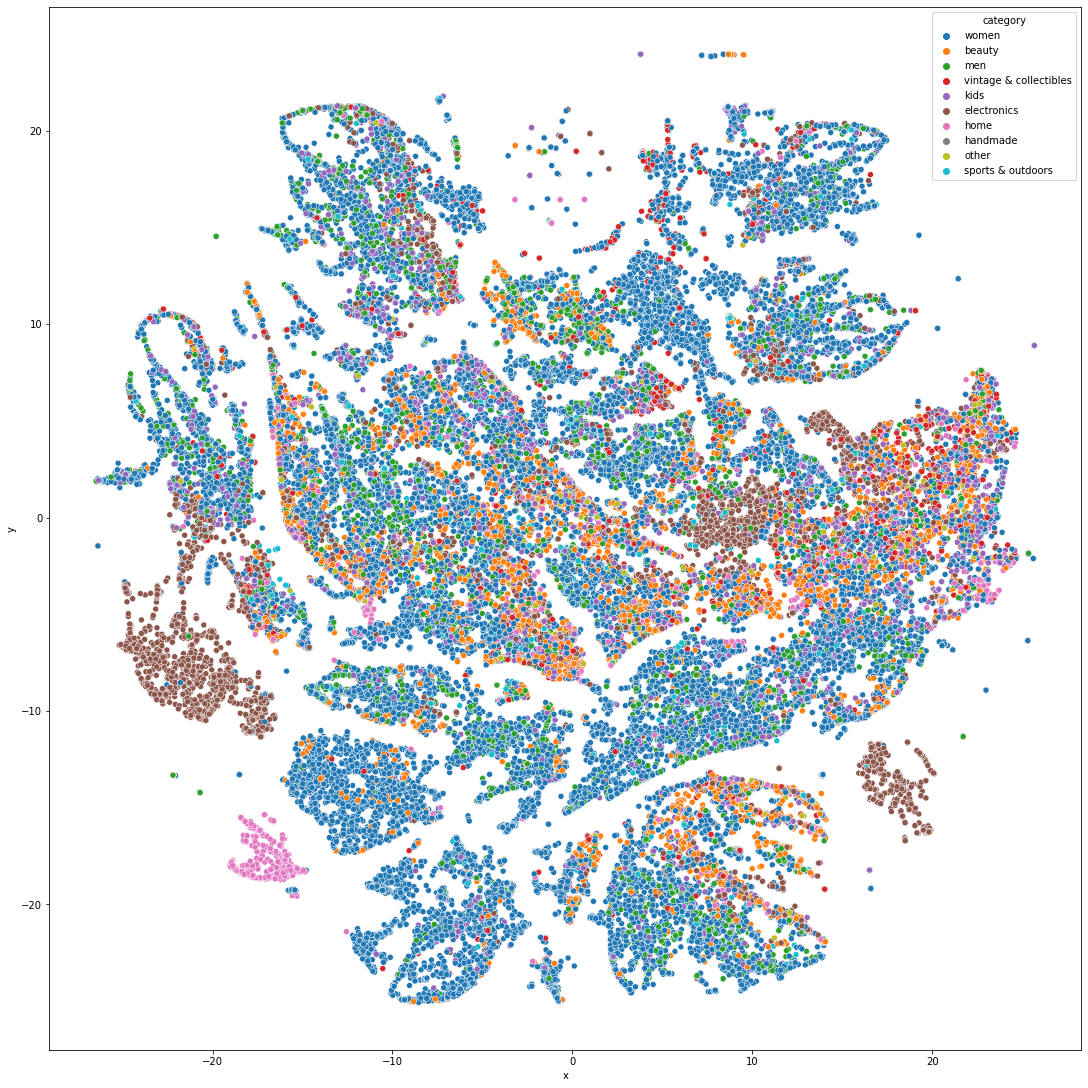

In [92]:
sns.scatterplot(data=kmeans_df, x='x', y='y', hue='category')

<AxesSubplot:xlabel='x', ylabel='y'>

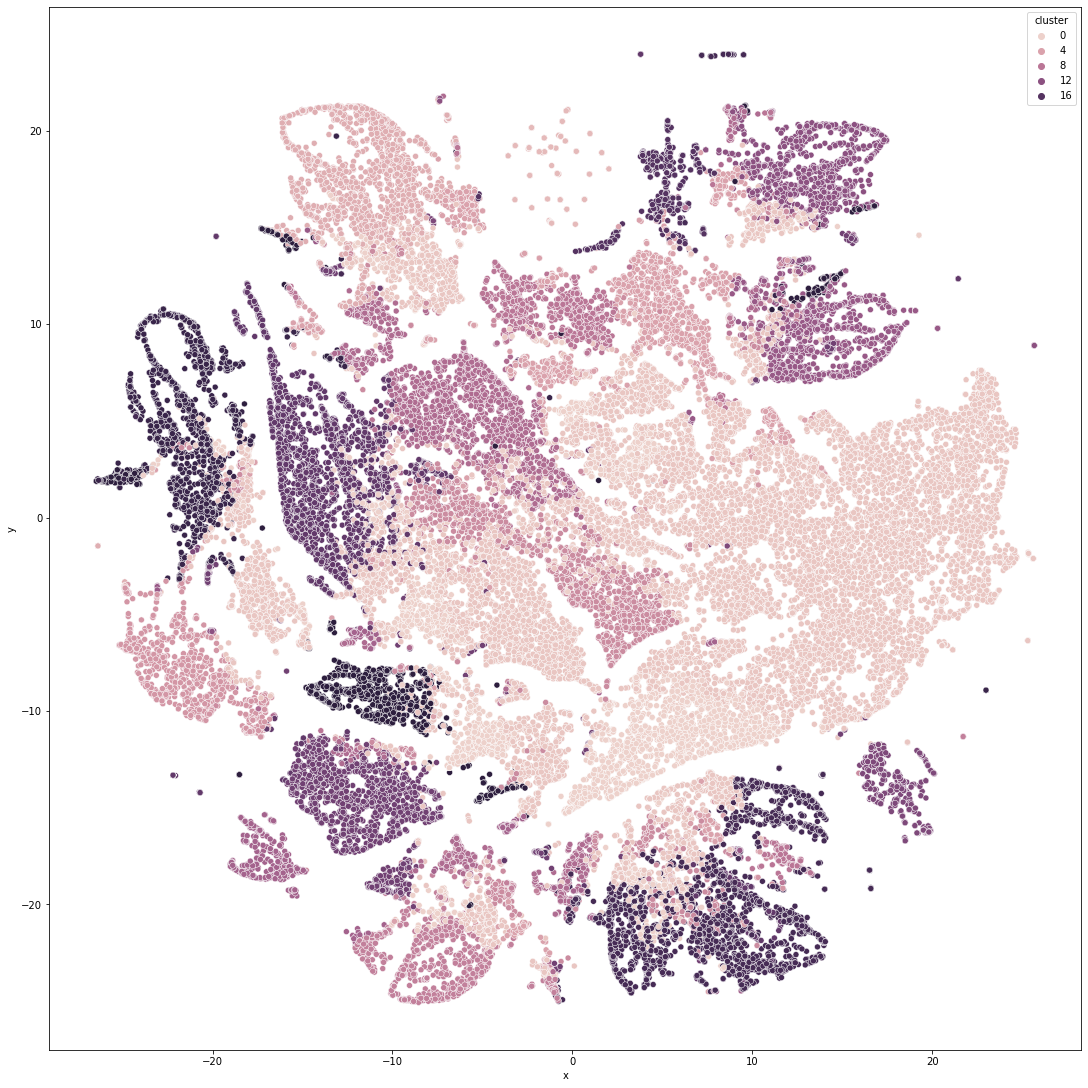

In [93]:
sns.scatterplot(data=kmeans_df, x='x', y='y', hue='cluster')

In [52]:
lda_model = LatentDirichletAllocation(n_components=200,
                                      learning_method='online',
                                      max_iter=20,
                                      random_state=42)

In [53]:
X_topics = lda_model.fit_transform(cvz)

KeyboardInterrupt: 

In [ ]:
X_topics.shape

In [21]:
n_top_words = 5
topic_summaries = []

topic_word = lda_model.components_  # get the topic words
vocab = cvectorizer.get_feature_names()

for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))
    print('Topic {}: {}'.format(i, ' | '.join(topic_words)))

Topic 0: size | pink | medium | super | cut
Topic 1: phone | screen | unlocked | plus | wore
Topic 2: free | leather | home | smoke | free home
Topic 3: price | firm | price firm | new | size
Topic 4: secret | pink | victories | victories secret | oz
Topic 5: small | size small | go | left | in
Topic 6: set | new | are | best | collection
Topic 7: bag | excellent | condition | excellent condition | one
Topic 8: please | ask | questions | feel | dont
Topic 9: size | women | like | wear | fit
Topic 10: day | air | next | fast | mint
Topic 11: perfect | condition | perfect condition | details | inches
Topic 12: description | yet | description yet | size | white
Topic 13: new | brand | brand new | am | tags
Topic 14: worn | like | new | never | size
Topic 15: authentic | box | 100 | original | 100 authentic
Topic 16: shipping | free | bundle | free shipping | items
Topic 17: condition | great | good | great condition | good condition
Topic 18: times | worn | ll | twice | used
Topic 19: use

In [22]:
tsne_model = TSNE(n_components=2, verbose=1, random_state=42, n_iter=500)

In [23]:
# reduce dimension to 2 using tsne
tsne_lda = tsne_model.fit_transform(X_topics)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 50000 samples in 0.092s...
[t-SNE] Computed neighbors for 50000 samples in 81.428s...
[t-SNE] Computed conditional probabilities for sample 1000 / 50000
[t-SNE] Computed conditional probabilities for sample 2000 / 50000
[t-SNE] Computed conditional probabilities for sample 3000 / 50000
[t-SNE] Computed conditional probabilities for sample 4000 / 50000
[t-SNE] Computed conditional probabilities for sample 5000 / 50000
[t-SNE] Computed conditional probabilities for sample 6000 / 50000
[t-SNE] Computed conditional probabilities for sample 7000 / 50000
[t-SNE] Computed conditional probabilities for sample 8000 / 50000
[t-SNE] Computed conditional probabilities for sample 9000 / 50000
[t-SNE] Computed conditional probabilities for sample 10000 / 50000
[t-SNE] Computed conditional probabilities for sample 11000 / 50000
[t-SNE] Computed conditional probabilities for sample 12000 / 50000
[t-SNE] Computed conditional probabilities for sa

In [49]:
unnormalized = np.matrix(X_topics)
doc_topic = unnormalized/unnormalized.sum(axis=1)

lda_keys = []
for i, tweet in enumerate(df['clean_item_description']):
    lda_keys += [doc_topic[i].argmax()]

lda_df = pd.DataFrame(tsne_lda, columns=['x','y'])
lda_df['description'] = df['clean_item_description']
lda_df['price'] = df['price_bin']
lda_df['category'] = df['c1']
lda_df['topic'] = lda_keys
lda_df['topic'] = lda_df['topic'].map(int)

<AxesSubplot:xlabel='x', ylabel='y'>

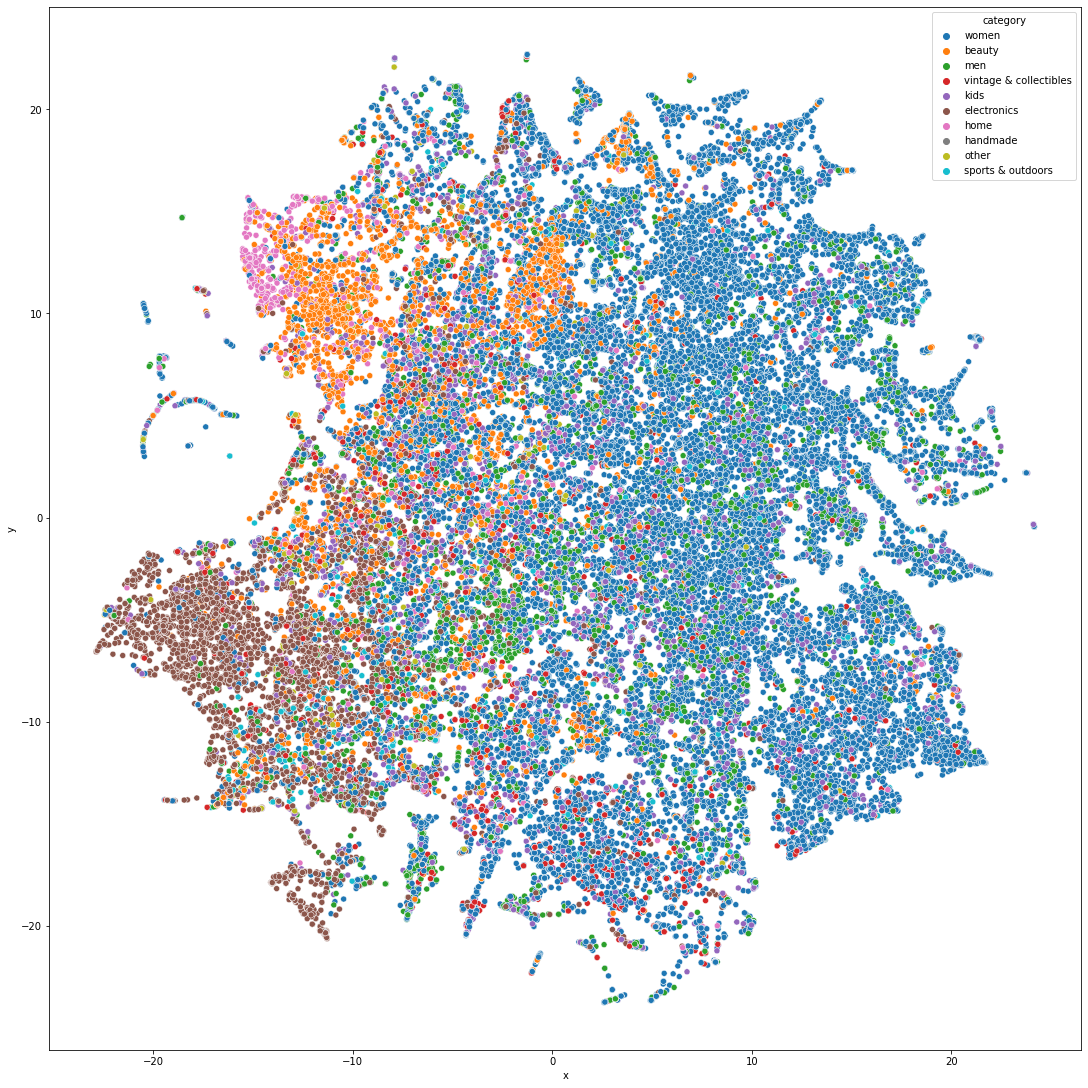

In [35]:
sns.scatterplot(data=lda_df, x='x', y='y', hue='category')

<AxesSubplot:xlabel='x', ylabel='y'>

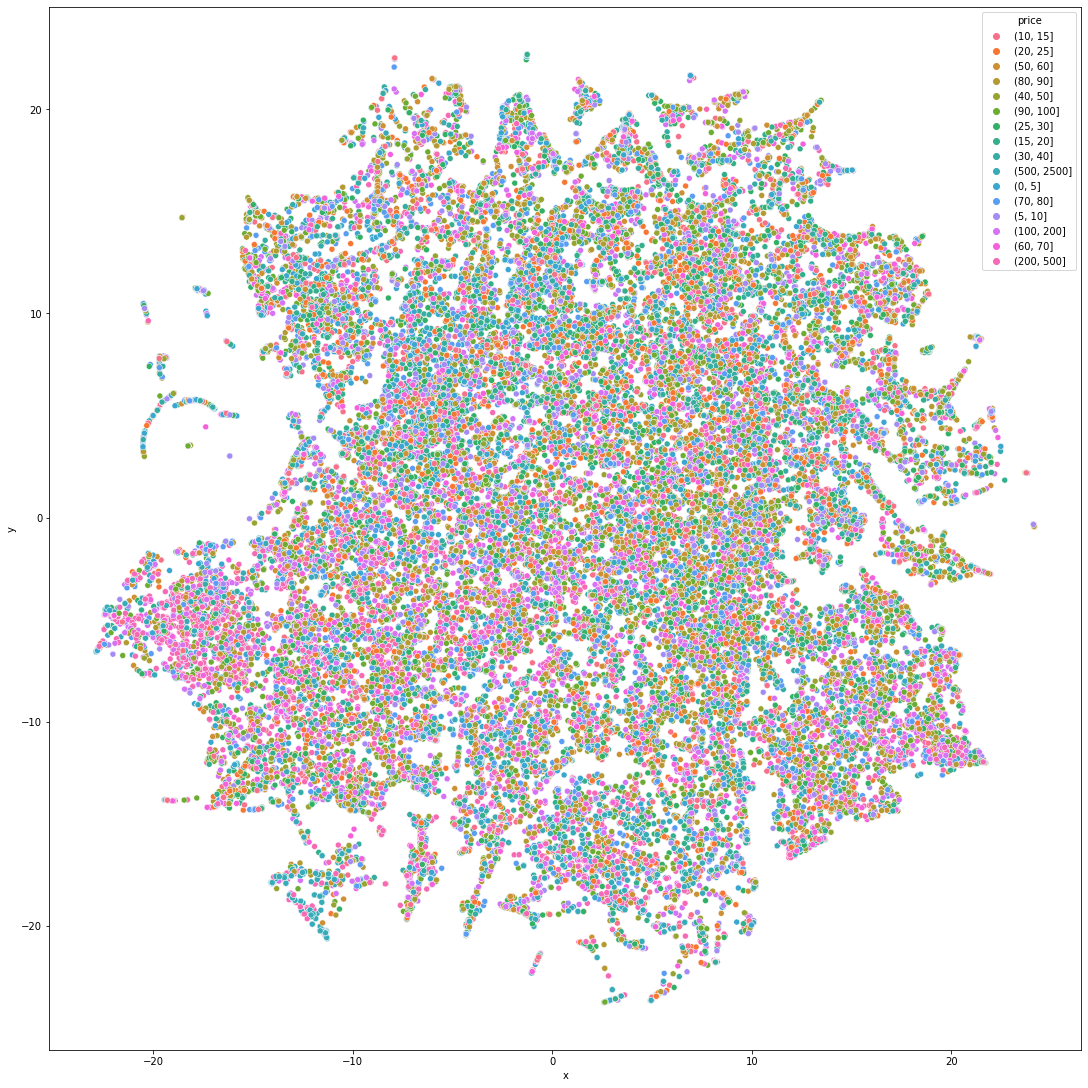

In [50]:
sns.scatterplot(data=lda_df, x='x', y='y', hue='price')

<AxesSubplot:xlabel='x', ylabel='y'>

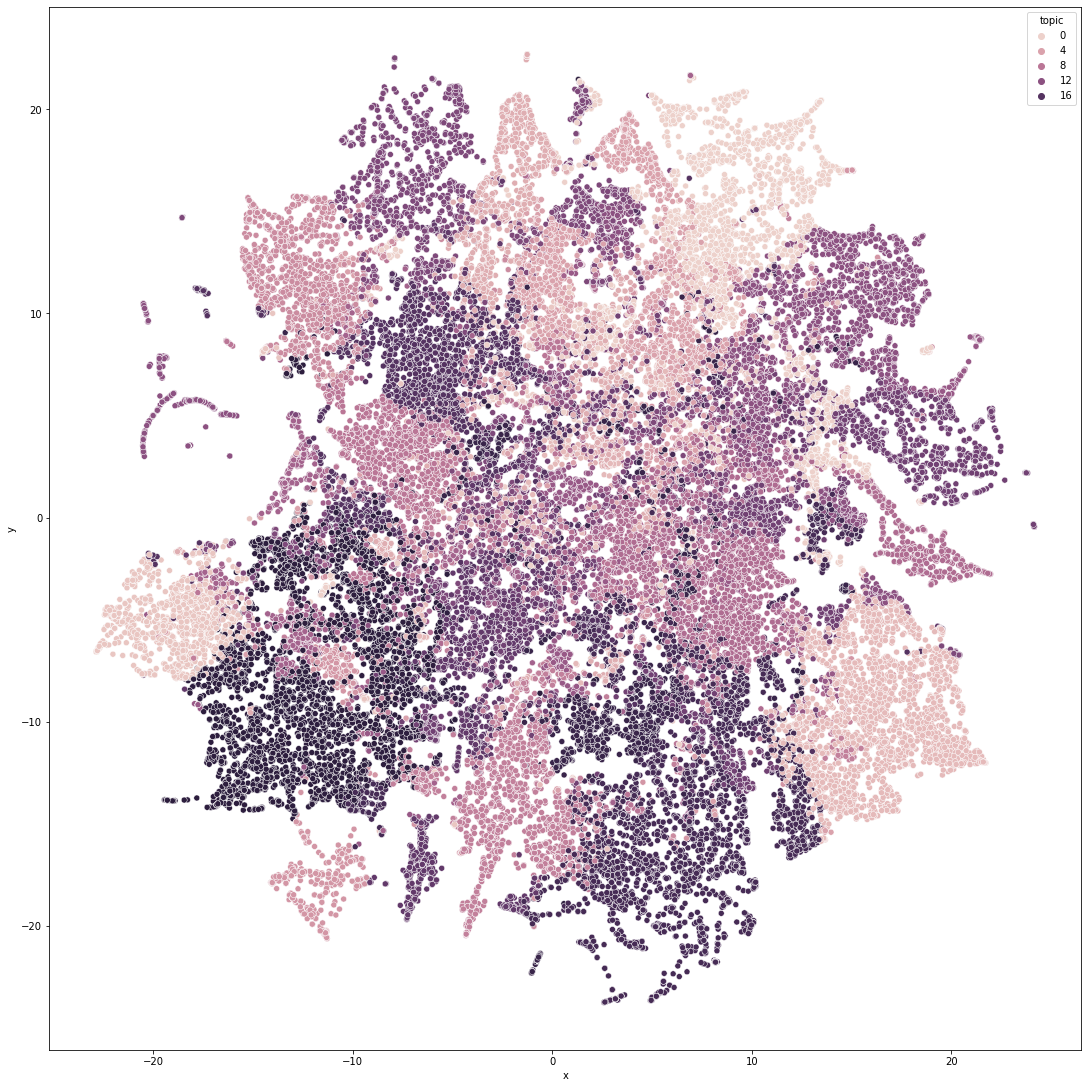

In [39]:
sns.scatterplot(data=lda_df, x='x', y='y', hue='topic')

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "fill_color" value "color", key "line_color" value "color" [renderer: GlyphRenderer(id='1217', ...)]
